In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('/content/drive/MyDrive/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3480.jpg', 'with_mask_3448.jpg', 'with_mask_3479.jpg', 'with_mask_3469.jpg', 'with_mask_3473.jpg']
['with_mask_1648.jpg', 'with_mask_1621.jpg', 'with_mask_1605.jpg', 'with_mask_163.jpg', 'with_mask_1647.jpg']


In [4]:
without_mask_files = os.listdir('/content/drive/MyDrive/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3562.jpg', 'without_mask_3596.jpg', 'without_mask_3545.jpg', 'without_mask_3583.jpg', 'without_mask_3578.jpg']
['without_mask_1723.jpg', 'without_mask_1747.jpg', 'without_mask_1746.jpg', 'without_mask_1742.jpg', 'without_mask_1764.jpg']


In [5]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [6]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [9]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


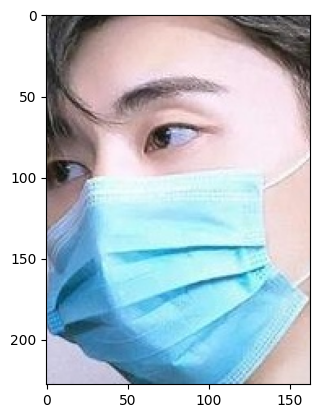

In [10]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

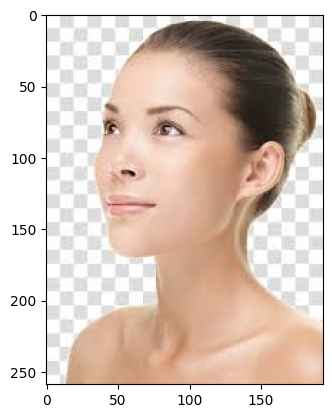

In [11]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/MyDrive/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/drive/MyDrive/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
type(data)

list

In [14]:
len(data)

7553

In [15]:
data[0]

array([[[177, 155, 132],
        [182, 160, 137],
        [186, 166, 142],
        ...,
        [221, 208, 189],
        [223, 213, 193],
        [216, 202, 183]],

       [[175, 153, 130],
        [180, 157, 135],
        [183, 162, 138],
        ...,
        [213, 200, 181],
        [215, 205, 185],
        [208, 194, 175]],

       [[171, 148, 125],
        [176, 151, 129],
        [179, 155, 131],
        ...,
        [207, 194, 174],
        [214, 203, 183],
        [206, 192, 173]],

       ...,

       [[ 19,  16,  20],
        [ 20,  19,  26],
        [ 49,  49,  55],
        ...,
        [ 82,  67,  51],
        [ 94,  74,  53],
        [116,  89,  68]],

       [[ 18,  17,  18],
        [ 16,  14,  17],
        [ 31,  30,  35],
        ...,
        [ 85,  67,  48],
        [109,  86,  63],
        [112,  84,  62]],

       [[ 19,  18,  19],
        [ 16,  14,  17],
        [ 21,  20,  25],
        ...,
        [ 93,  70,  50],
        [117,  89,  65],
        [108,  76,  51]]

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [19]:
type(X)

numpy.ndarray

In [20]:
type(Y)

numpy.ndarray

In [21]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [22]:
print(Y)

[1 1 1 ... 0 0 0]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [26]:
X_train[0]

array([[[ 75,  82, 100],
        [ 75,  82, 100],
        [ 76,  83, 101],
        ...,
        [ 93, 100, 116],
        [ 93, 100, 116],
        [ 93, 100, 116]],

       [[ 75,  82, 100],
        [ 76,  83, 101],
        [ 77,  84, 102],
        ...,
        [ 93, 100, 116],
        [ 93, 100, 116],
        [ 93, 100, 116]],

       [[ 76,  83, 101],
        [ 77,  84, 102],
        [ 78,  85, 103],
        ...,
        [ 94, 101, 117],
        [ 94, 101, 117],
        [ 94, 101, 117]],

       ...,

       [[207, 208, 228],
        [211, 212, 232],
        [213, 214, 234],
        ...,
        [238, 241, 250],
        [237, 240, 249],
        [237, 240, 247]],

       [[201, 202, 222],
        [205, 206, 226],
        [207, 208, 228],
        ...,
        [238, 241, 250],
        [238, 241, 250],
        [237, 240, 247]],

       [[197, 199, 220],
        [199, 202, 222],
        [202, 205, 225],
        ...,
        [238, 241, 249],
        [238, 241, 249],
        [237, 240, 247]]

In [27]:
X_train_scaled[0]

array([[[0.29411765, 0.32156863, 0.39215686],
        [0.29411765, 0.32156863, 0.39215686],
        [0.29803922, 0.3254902 , 0.39607843],
        ...,
        [0.36470588, 0.39215686, 0.45490196],
        [0.36470588, 0.39215686, 0.45490196],
        [0.36470588, 0.39215686, 0.45490196]],

       [[0.29411765, 0.32156863, 0.39215686],
        [0.29803922, 0.3254902 , 0.39607843],
        [0.30196078, 0.32941176, 0.4       ],
        ...,
        [0.36470588, 0.39215686, 0.45490196],
        [0.36470588, 0.39215686, 0.45490196],
        [0.36470588, 0.39215686, 0.45490196]],

       [[0.29803922, 0.3254902 , 0.39607843],
        [0.30196078, 0.32941176, 0.4       ],
        [0.30588235, 0.33333333, 0.40392157],
        ...,
        [0.36862745, 0.39607843, 0.45882353],
        [0.36862745, 0.39607843, 0.45882353],
        [0.36862745, 0.39607843, 0.45882353]],

       ...,

       [[0.81176471, 0.81568627, 0.89411765],
        [0.82745098, 0.83137255, 0.90980392],
        [0.83529412, 0

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
  num_of_classes = 2

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


  model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))

  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.5))


  model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [30]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4630 - acc: 0.7958 - val_loss: 0.3218 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2802 - acc: 0.8906 - val_loss: 0.2941 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2419 - acc: 0.8985 - val_loss: 0.2536 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2161 - acc: 0.9250 - val_loss: 0.2183 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1608 - acc: 0.9380 - val_loss: 0.2516 - val_acc: 0.9140


In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1806 - acc: 0.9232
Test Accuracy = 0.9232296347618103


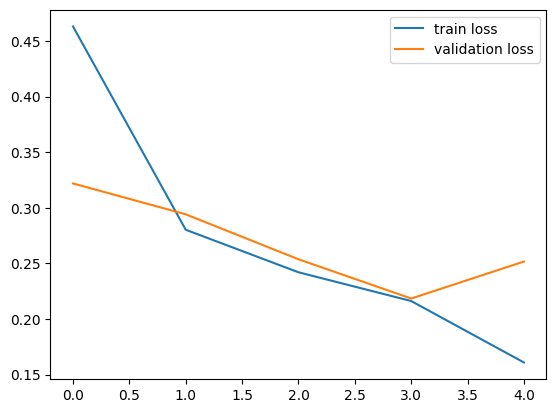

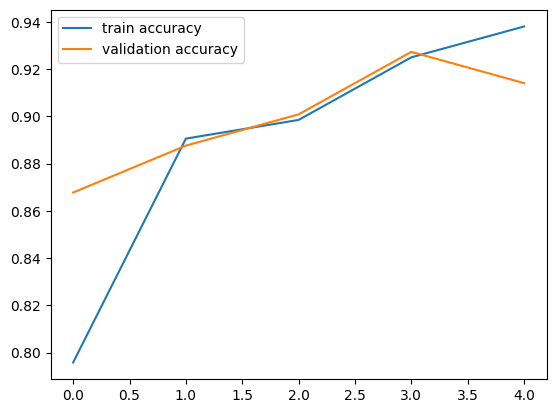

In [33]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/Mask2.jpeg


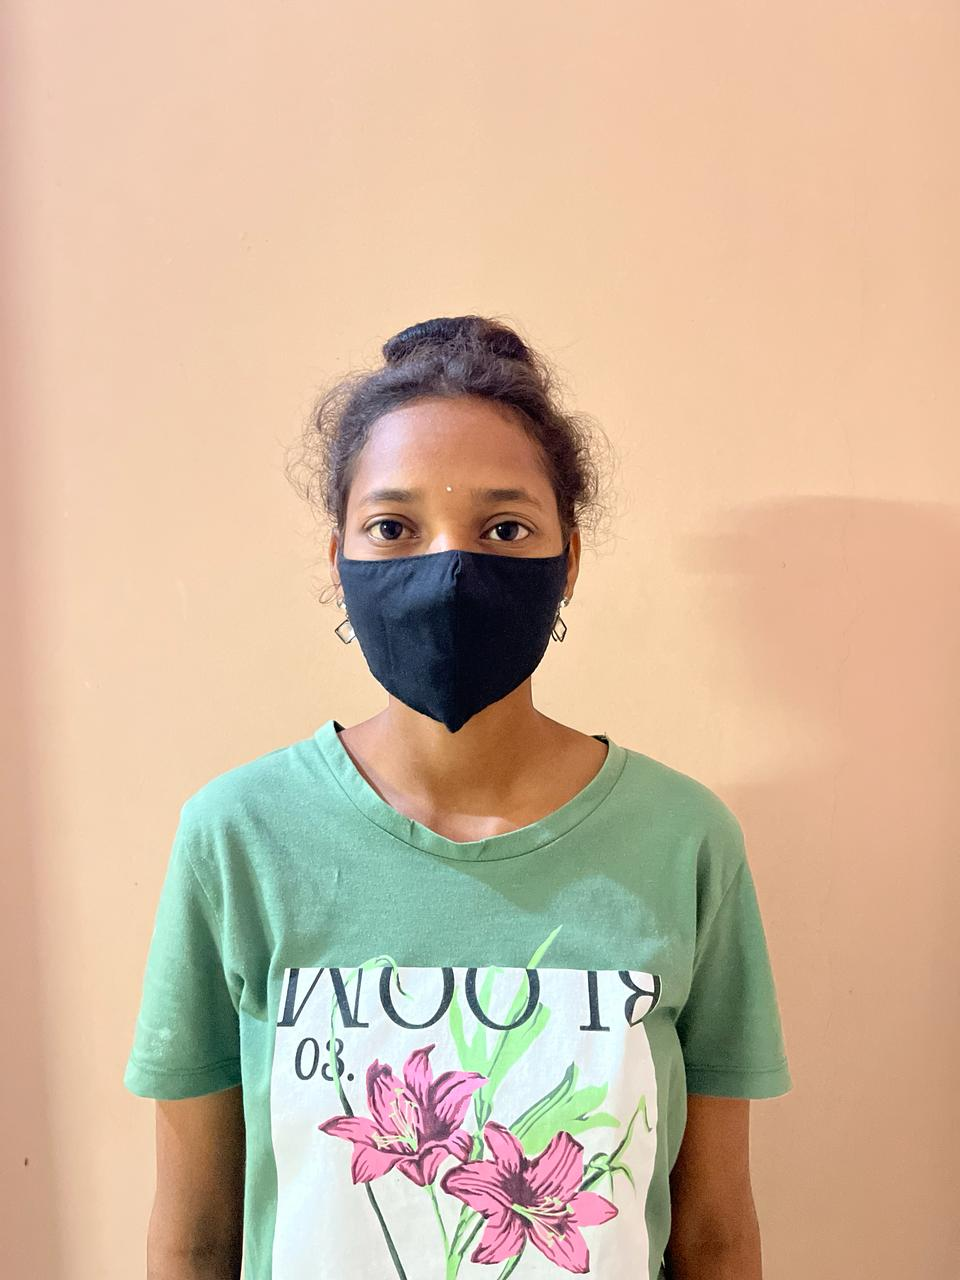

1/1 [==============================] - 0s 419ms/step
[[0.24816088 0.6844309 ]]
1
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')